# Fallzahlen in Deutschland breinigen

In [1]:
import pandas as pd

### Einlesen der HTML Seite mit den Fallzahlen aus Deutschland von der Webseite.
Die Seite wurde vorab mittels einfachen wget heruntergeladen. Direkter Zugriff wird von RKI blockiert.

Die Zahlen sind, wie in Deutschland üblich mit einem `.` als Trenner für die Tausender und `,` als Komma für Dezimalzahlen dargestellt. Damit Pandas die Zahlen nicht falsch interpretiert, setzen wir die jeweiligen Konfigurationen beim Einlesen der Seite.

In [2]:
df = pd.read_html('../original_data/Fallzahlen.html', decimal=',', thousands='.')

In [3]:
len(df)

1

Pandas liefert in diesem Fall nicht nur ein einzelnes Dataset zurück, sondern eine Liste mit allen gefundenen und geparsten Tabellen als Pandas Dataframe. Auf der Seite des RKI gibt es derzeit nur eine Tabelle. Somit nehmen wir einfach die Erste aus dem Array der gefunden Daten.

In [4]:
df_de = df[0]
df_de.head()

Bundes­land Elektro­nisch über­mittelte Fälle  \
   Unnamed: 0_level_1                           An­zahl   
0  Baden-Württem­berg                             28712   
1              Bayern                             38310   
2              Berlin                              5237   
3         Brandenburg                              2275   
4              Bremen                               609   

                                                            
  Dif­fe­renz zum Vor­tag Fälle/ 100.000 Einw. Todes­fälle  
0                    +459                  259        1031  
1                    +461                  293        1336  
2                     +41                  140          97  
3                     +37                   91          67  
4                      +5                   89          25

Da die Tabelle schwierig zu verarbeitende Spaltenüberschriften hat, bennen wir diese um, damit eine spätere Bereinigung einfacher ist. Die Spaltenanzahl ist bekannt, daher erledigen wir das relativ pragmatisch. 

In [5]:
df_de.columns = ['Bundesland', 'Anzahl', 'diff', 'Pro_Tsd', 'Gestorben']

In [6]:
df_de.tail()

,Bundesland,Anzahl,diff,Pro_Tsd,Gestorben
12,Sachsen,4253,+24,104,117
13,Sachsen-Anhalt,1383,+14,63,32
14,Schles­wig-Holstein,2414,-12*,83,70
15,Thüringen,1798,+13,84,55
16,Gesamt,143457,+1.785,173,4598


Die Reihe mit den Gesamtsummen benötigen wir nicht und entfernen sie. Weiterhin verwerfe ich die Spalte mit den Änderungen zum Vortag. Anschließend sortieren wir das Dataframe aufsteigend nach Anzahl.

In [7]:
df_de.drop(columns=['diff'], index=[16], inplace=True)
#df_de.sort_values(by=['Anzahl'], ascending=True, inplace=True)

In [8]:
df_de.to_csv('../data/cases_germany_states.csv')

Abschließend plotten wir eine Vorschau als horizontalen Barchart mit den registriereten Infektionen nach Bundesland.

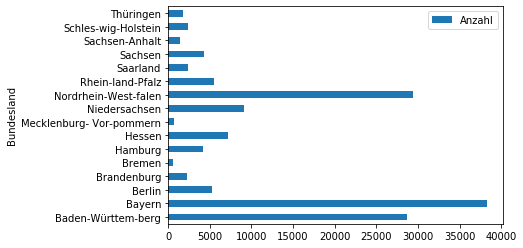

In [9]:
df_de.plot.barh(x='Bundesland', y='Anzahl')